In [1051]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from torch.autograd import Variable
import torch
from torch import nn, optim
from torch.nn import functional as F

# Reading Cleveland data input

In [1052]:
df = pd.read_csv('cleveland_data.csv', header = None, skiprows = 1)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope','ca', 'thal', 'condition']

# Helper functions

In [1053]:
model_accuracies = []

In [1054]:
def preprocessing(df,test_split):
    X = df.iloc[:,:-1].values
    y = df.iloc[:,-1].values
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_split, random_state = 0)

    sc = StandardScaler()

    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    
    return X_train, X_test, y_train, y_test

In [1055]:
def print_accuracy(model_name, cm_train, cm_test, y_train, y_test, model_accuracies):
    training_accuracy = (cm_train[0][0] + cm_train[1][1])/len(y_train)
    test_accuracy = (cm_test[0][0] + cm_test[1][1])/len(y_test)
    print(f"{model_name} training accuracy = {training_accuracy}")
    print(f"{model_name} test accuracy = {test_accuracy}")
    model_accuracies.append([model_name,test_accuracy])
    
    return model_accuracies

# Logistic Regression

In [1056]:
X_train, X_test, y_train, y_test = preprocessing(df,0.3)

model = LogisticRegression()
model.fit(X_train, y_train)
pred_test = model.predict(X_test)
cm_test = confusion_matrix(pred_test, y_test)
pred_train = model.predict(X_train)
cm_train = confusion_matrix(pred_train, y_train)

model_accuracies = print_accuracy("Logistic Regression",cm_train, cm_test, y_train, y_test, model_accuracies)

Logistic Regression training accuracy = 0.855072463768116
Logistic Regression test accuracy = 0.8555555555555555


# Random Forest

In [1057]:
X_train, X_test, y_train, y_test = preprocessing(df,0.4)

model = RandomForestClassifier(n_estimators = 7)
model.fit(X_train, y_train)
pred_test = model.predict(X_test)
cm_test = confusion_matrix(pred_test, y_test)
pred_train = model.predict(X_train)
cm_train = confusion_matrix(pred_train, y_train)

model_accuracies = print_accuracy("Random Forest",cm_train, cm_test, y_train, y_test, model_accuracies)

Random Forest training accuracy = 0.9775280898876404
Random Forest test accuracy = 0.7983193277310925


# SVM

In [1058]:
X_train, X_test, y_train, y_test = preprocessing(df,0.2)

model = SVC()
model.fit(X_train, y_train)
pred_test = model.predict(X_test)
cm_test = confusion_matrix(pred_test, y_test)
pred_train = model.predict(X_train)
cm_train = confusion_matrix(pred_train, y_train)

model_accuracies = print_accuracy("SVM",cm_train, cm_test, y_train, y_test, model_accuracies)

SVM training accuracy = 0.9071729957805907
SVM test accuracy = 0.85


# Native Bayes

In [1059]:
X_train, X_test, y_train, y_test = preprocessing(df,0.2)

model = GaussianNB()
model.fit(X_train, y_train)
pred_test = model.predict(X_test)
cm_test = confusion_matrix(pred_test, y_test)
pred_train = model.predict(X_train)
cm_train = confusion_matrix(pred_train, y_train)

model_accuracies = print_accuracy("Native Bayes",cm_train, cm_test, y_train, y_test, model_accuracies)

Native Bayes training accuracy = 0.8565400843881856
Native Bayes test accuracy = 0.8333333333333334


# Decision Tree

In [1060]:
X_train, X_test, y_train, y_test = preprocessing(df,0.2)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
pred_test = model.predict(X_test)
cm_test = confusion_matrix(pred_test, y_test)
pred_train = model.predict(X_train)
cm_train = confusion_matrix(pred_train, y_train)

model_accuracies = print_accuracy("Decision Tree",cm_train, cm_test, y_train, y_test, model_accuracies)

Decision Tree training accuracy = 1.0
Decision Tree test accuracy = 0.6833333333333333


# XGBoost

In [1061]:
X_train, X_test, y_train, y_test = preprocessing(df,0.3)

model = XGBClassifier()
model.fit(X_train, y_train)
pred_test = model.predict(X_test)
cm_test = confusion_matrix(pred_test, y_test)

pred_train = model.predict(X_train)
cm_train = confusion_matrix(pred_train, y_train)

model_accuracies = print_accuracy("XGBoost",cm_train, cm_test, y_train, y_test, model_accuracies)

[19:37:15] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost training accuracy = 1.0
XGBoost test accuracy = 0.8111111111111111


/Users/alexandrakim/opt/anaconda3/envs/cad/lib/python3.10/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


# CatBoost

In [1062]:
X_train, X_test, y_train, y_test = preprocessing(df,0.3)

model = CatBoostClassifier()
model.fit(X_train, y_train)
pred_test = model.predict(X_test)
cm_test = confusion_matrix(pred_test, y_test)

pred_train = model.predict(X_train)
cm_train = confusion_matrix(pred_train, y_train)

model_accuracies = print_accuracy("CatBoost",cm_train, cm_test, y_train, y_test, model_accuracies)

Learning rate set to 0.005258
0:	learn: 0.6885992	total: 1.63ms	remaining: 1.63s
1:	learn: 0.6840467	total: 2.04ms	remaining: 1.02s
2:	learn: 0.6806249	total: 2.38ms	remaining: 791ms
3:	learn: 0.6768973	total: 2.75ms	remaining: 686ms
4:	learn: 0.6744085	total: 3.41ms	remaining: 679ms
5:	learn: 0.6705872	total: 4.09ms	remaining: 678ms
6:	learn: 0.6676589	total: 4.4ms	remaining: 624ms
7:	learn: 0.6639000	total: 4.77ms	remaining: 591ms
8:	learn: 0.6600509	total: 5.38ms	remaining: 592ms
9:	learn: 0.6561451	total: 5.71ms	remaining: 565ms
10:	learn: 0.6528145	total: 6.1ms	remaining: 548ms
11:	learn: 0.6486841	total: 6.47ms	remaining: 533ms
12:	learn: 0.6452873	total: 7.49ms	remaining: 569ms
13:	learn: 0.6422106	total: 7.83ms	remaining: 551ms
14:	learn: 0.6386898	total: 8.37ms	remaining: 550ms
15:	learn: 0.6344875	total: 8.71ms	remaining: 536ms
16:	learn: 0.6311988	total: 9.21ms	remaining: 533ms
17:	learn: 0.6283264	total: 9.74ms	remaining: 531ms
18:	learn: 0.6254759	total: 10.5ms	remaining: 

# K-Nearest Neighbors

In [1063]:
X_train, X_test, y_train, y_test = preprocessing(df,0.3)

model = KNeighborsClassifier(n_neighbors=9)
model.fit(X_train, y_train)
pred_test = model.predict(X_test)
cm_test = confusion_matrix(pred_test, y_test)
pred_train = model.predict(X_train)
cm_train = confusion_matrix(pred_train, y_train)

model_accuracies = print_accuracy("K-Nearest Neighbors",cm_train, cm_test, y_train, y_test, model_accuracies)

K-Nearest Neighbors training accuracy = 0.8599033816425121
K-Nearest Neighbors test accuracy = 0.8111111111111111


# Convolutional Neural Network

Epoch 1, Loss: 0.689, Acc:61.84%, Test Acc: 52.22%
Epoch 2, Loss: 0.672, Acc:69.57%, Test Acc: 64.44%
Epoch 3, Loss: 0.656, Acc:73.91%, Test Acc: 70.00%
Epoch 4, Loss: 0.638, Acc:77.29%, Test Acc: 73.33%
Epoch 5, Loss: 0.620, Acc:77.78%, Test Acc: 78.89%
Epoch 6, Loss: 0.600, Acc:79.23%, Test Acc: 78.89%
Epoch 7, Loss: 0.580, Acc:82.61%, Test Acc: 81.11%
Epoch 8, Loss: 0.558, Acc:84.06%, Test Acc: 80.00%
Epoch 9, Loss: 0.533, Acc:84.54%, Test Acc: 80.00%
Epoch 10, Loss: 0.509, Acc:84.54%, Test Acc: 80.00%
Epoch 11, Loss: 0.484, Acc:83.57%, Test Acc: 78.89%
Epoch 12, Loss: 0.458, Acc:84.06%, Test Acc: 80.00%
Epoch 13, Loss: 0.436, Acc:85.02%, Test Acc: 80.00%
Epoch 14, Loss: 0.415, Acc:85.51%, Test Acc: 81.11%
Epoch 15, Loss: 0.394, Acc:85.99%, Test Acc: 82.22%
Epoch 16, Loss: 0.379, Acc:85.99%, Test Acc: 82.22%
Epoch 17, Loss: 0.363, Acc:85.99%, Test Acc: 81.11%
Epoch 18, Loss: 0.356, Acc:85.51%, Test Acc: 82.22%
Epoch 19, Loss: 0.350, Acc:85.51%, Test Acc: 81.11%
Epoch 20, Loss: 0.343

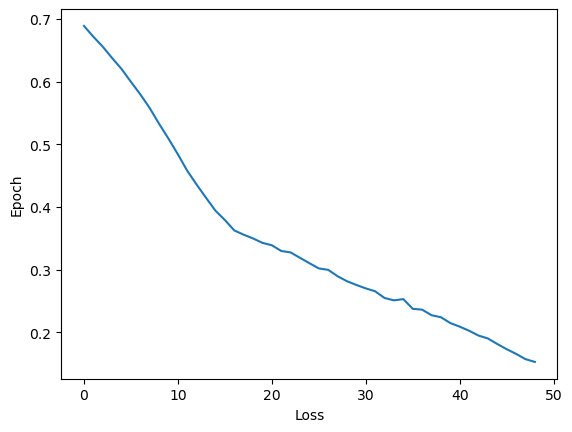

In [1064]:
X_train, X_test, y_train, y_test = preprocessing(df,0.3)
X_train = torch.tensor(X_train).float()
X_test = torch.tensor(X_test).float()
y_train = torch.tensor(y_train).long()
y_test = torch.tensor(y_test).long()


class HeartDiseaseNN(nn.Module):
    def __init__(self):
        super(HeartDiseaseNN, self).__init__()
        self.fc1 = nn.Linear(13, 64)
        self.fc2 = nn.Linear(64, 128)
        self.fc3 = nn.Linear(128, 256)
        self.fc4 = nn.Linear(256, 2)
        self.act = nn.LeakyReLU()
        self.dropout = nn.Dropout(0.1)
    def forward(self, x):
        x = self.act(self.fc1(x))
        x = self.act(self.fc2(x))
        x = self.act(self.fc3(x))
        x = self.dropout(x)
        return self.fc4(x)

model = HeartDiseaseNN()
optimizer = optim.AdamW(model.parameters())
criterion = nn.CrossEntropyLoss()

losses = []

max_test = 0
best_params = model.state_dict()
for epoch in range(1, 50):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())
    _, preds_y = torch.max(outputs, 1)
    train_acc = accuracy_score(y_train, preds_y)
    
    pred_test = model(X_test)
    _, preds_test_y = torch.max(pred_test, 1)
    test_acc = accuracy_score(y_test, preds_test_y)
    print(f"Epoch {epoch}, Loss: {loss.item():.3f}, Acc:{train_acc*100:.2f}%, Test Acc: {test_acc * 100:.2f}%")
    if test_acc > max_test:
        max_test = test_acc
        best_params = model.state_dict()
model.load_state_dict(best_params)

plt.plot(losses)
plt.xlabel("Loss")
plt.ylabel("Epoch")

pred_test = model(X_test)
_, preds_y = torch.max(pred_test, 1)

accuracy_score = accuracy_score(y_test, preds_y)
model_accuracies.append(['CNN', accuracy_score])


# Model Accuracy Summary

In [1065]:
model_accuracies.sort(key=lambda x: x[1],reverse=True)
print(model_accuracies)

[['CatBoost', 0.8666666666666667], ['Logistic Regression', 0.8555555555555555], ['SVM', 0.85], ['CNN', 0.8444444444444444], ['Native Bayes', 0.8333333333333334], ['XGBoost', 0.8111111111111111], ['K-Nearest Neighbors', 0.8111111111111111], ['Random Forest', 0.7983193277310925], ['Decision Tree', 0.6833333333333333]]
